In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.feature_selection import RFE

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [12]:
from sklearn.svm import LinearSVC

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn import metrics

In [15]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import math

In [18]:
from sklearn import svm

In [19]:
from sklearn.metrics import r2_score

In [20]:
from sklearn import preprocessing
from sklearn import utils

In [21]:
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV

In [22]:
from numpy import mean
from numpy import std
from numpy import amin
from numpy import amax

In [23]:
df = pd.read_csv('../../data/extracted_features_round4_training.csv', header=0)

In [24]:
df = df.drop(columns='Unnamed: 0')

In [25]:
#df = df[['CV', 'TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT', 'AKWPWMEAN',
#       'TAWSSIMPSPACY', 'TKWAORATIO', 'TAKWSIMSPACY', 'TMIKWP', 'TABSSIMSPACY',
#       'TAFSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TKWAOWRATIO', 'TAFSSD']]

In [26]:
scaler = StandardScaler()

In [27]:
X = df.drop(columns='CV')

In [28]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns,index = df.index)

In [29]:
float_labels = np.array(df['CV'])

In [30]:
lab_enc = preprocessing.LabelEncoder()
labels = lab_enc.fit_transform(float_labels)

In [31]:
df.columns

Index(['CV', 'TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'TP', 'AP', 'TAPD', 'TAPMEAN', 'TS', 'AS', 'TASD',
       'TASMEAN', 'TASCCRATIO', 'TASCCD', 'TKWC', 'AKWC', 'TAKWCRATIO',
       'AMIKWP', 'TMIKWS', 'AMIKWS', 'AFSP', 'TAFSPMEAN', 'TAFSPD', 'AFSS',
       'TAFSSMEAN', 'TAFSSD', 'TMIKWAORATIO', 'TKWAORATIO', 'TKWAOWRATIO',
       'TKWPMEAN', 'AKWPMEAN', 'TAKWPMEAN', 'TAKWPD', 'TKWPWMEAN', 'AKWPWMEAN',
       'TAKWPWMEAN', 'TAKWPWD', 'TAMIKWFP', 'TAMIKWDIST', 'TAKWDIST',
       'TASIMSPACY', 'TABSSIMSPACY', 'TAWSSIMSPACY', 'TAASSIMSPACY',
       'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY', 'TAGSSIMRATIOSPACY',
       'TVC', 'AVC', 'TAVCD', 'TNC', 'ANC', 'TANCD', 'TABSSIMBERT',
       'TAWSSIMBERT', 'TAASSIMSBERT', 'TAFSSIMBERT', 'TABSSIMPBERT',
       'TAWSSIMPBERT', 'TAGSSIMRATIOBERT', 'TAMIKWASSIMSPACY',
       'TAMIKWBSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TMIKWP', 'TAMKWSSIMSPACY',
       'TAMKWSP', 'TAMKWSPD', 'TAMKWSS', 'TAMKWSSD', 'TA

In [30]:
feature_list = list(X.columns)

In [31]:
features = np.array(X)

In [32]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [43]:
default_svm = svm.SVC(kernel='linear')
rfe = RFECV(default_svm,cv=cv,scoring="f1_macro")

rfe.fit(X,labels)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
      estimator=SVC(kernel='linear'), scoring='f1_macro')

In [44]:
selected_features = np.array(feature_list)[rfe.get_support()]

In [45]:
selected_features.shape

(94,)

In [46]:
selected_features

array(['TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'AP', 'TAPD', 'TAPMEAN', 'AS', 'TASD', 'TASMEAN',
       'TASCCRATIO', 'TASCCD', 'TKWC', 'AKWC', 'TAKWCRATIO', 'AMIKWP',
       'TMIKWS', 'AMIKWS', 'AFSP', 'TAFSPMEAN', 'TAFSPD', 'AFSS',
       'TAFSSMEAN', 'TAFSSD', 'TMIKWAORATIO', 'TKWAORATIO', 'TKWAOWRATIO',
       'TKWPMEAN', 'AKWPMEAN', 'TAKWPMEAN', 'TAKWPD', 'TKWPWMEAN',
       'AKWPWMEAN', 'TAKWPWMEAN', 'TAKWPWD', 'TAMIKWFP', 'TAMIKWDIST',
       'TAKWDIST', 'TASIMSPACY', 'TABSSIMSPACY', 'TAWSSIMSPACY',
       'TAASSIMSPACY', 'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY',
       'TAGSSIMRATIOSPACY', 'TVC', 'AVC', 'TAVCD', 'ANC', 'TANCD',
       'TABSSIMBERT', 'TAWSSIMBERT', 'TAASSIMSBERT', 'TAFSSIMBERT',
       'TABSSIMPBERT', 'TAWSSIMPBERT', 'TAGSSIMRATIOBERT',
       'TAMIKWASSIMSPACY', 'TAMIKWBSSIMSPACY', 'TAMIKWWSSIMSPACY',
       'TMIKWP', 'TAMKWSSIMSPACY', 'TAMKWSP', 'TAMKWSPD', 'TAMKWSS',
       'TAMKWSSD', 'TAMKWFP', 'TAKWSIMSP

In [33]:
X_selected = X[['TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'AP', 'TAPD', 'TAPMEAN', 'AS', 'TASD', 'TASMEAN',
       'TASCCRATIO', 'TASCCD', 'TKWC', 'AKWC', 'TAKWCRATIO', 'AMIKWP',
       'TMIKWS', 'AMIKWS', 'AFSP', 'TAFSPMEAN', 'TAFSPD', 'AFSS',
       'TAFSSMEAN', 'TAFSSD', 'TMIKWAORATIO', 'TKWAORATIO', 'TKWAOWRATIO',
       'TKWPMEAN', 'AKWPMEAN', 'TAKWPMEAN', 'TAKWPD', 'TKWPWMEAN',
       'AKWPWMEAN', 'TAKWPWMEAN', 'TAKWPWD', 'TAMIKWFP', 'TAMIKWDIST',
       'TAKWDIST', 'TASIMSPACY', 'TABSSIMSPACY', 'TAWSSIMSPACY',
       'TAASSIMSPACY', 'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY',
       'TAGSSIMRATIOSPACY', 'TVC', 'AVC', 'TAVCD', 'ANC', 'TANCD',
       'TABSSIMBERT', 'TAWSSIMBERT', 'TAASSIMSBERT', 'TAFSSIMBERT',
       'TABSSIMPBERT', 'TAWSSIMPBERT', 'TAGSSIMRATIOBERT',
       'TAMIKWASSIMSPACY', 'TAMIKWBSSIMSPACY', 'TAMIKWWSSIMSPACY',
       'TMIKWP', 'TAMKWSSIMSPACY', 'TAMKWSP', 'TAMKWSPD', 'TAMKWSS',
       'TAMKWSSD', 'TAMKWFP', 'TAKWSIMSPACY', 'TAKWSP', 'TAKWSPD',
       'TAKWSS', 'TAKWSSD', 'TAGSSIMDISTSPACY', 'TSCC', 'ASCC',
       'TKWCRATIO', 'AKWCRATIO', 'TAKWCRATIORATIO', 'TMIKWAO', 'TKWAO',
       'TKWAOW', 'AVCRATIO', 'TAVCRATIOD', 'ANCRATIO', 'TANCRATIOD',
       'TAGSSIMCSPACY', 'TAGSSIMCBERT', 'TAKWSSIMVARSPACY']]

In [34]:
features_selected = np.array(X_selected)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['poly','rbf', 'sigmoid','linear']
}

In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
svm_d = svm.SVC(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svm_random = RandomizedSearchCV(estimator=svm_d, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_macro', 
                              cv = cv, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
svm_random.fit(features_selected, labels);

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [52]:
svm_random.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [55]:

base_model = svm.SVC(random_state = 42)
base_model.fit(X_selected, labels)
base_accuracy = mean(cross_val_score(base_model, features_selected, labels, scoring='f1_macro', cv=cv))
print('F1: {:0.5f}.'.format(base_accuracy))

F1: 0.09771.


In [56]:

best_random = svm_random.best_estimator_
random_accuracy = mean(cross_val_score(best_random, features_selected, labels, scoring='f1_macro', cv=cv))
print('F1: {:0.5f}.'.format(random_accuracy))

F1: 0.14536.


In [57]:

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 48.78%.


In [58]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [50, 100, 200, 300],
    'gamma': [0.0005, 0.001, 0.002, 0.003],
    'kernel': ['rbf']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svm_d, param_grid = param_grid, scoring = 'f1_macro',
                          cv = cv, n_jobs = -1, verbose = 2, return_train_score=True)

In [59]:
# Fit the grid search to the data
grid_search.fit(features_selected, labels);

Fitting 30 folds for each of 16 candidates, totalling 480 fits


In [60]:
grid_search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [61]:
best_grid = grid_search.best_estimator_
grid_accuracy = mean(cross_val_score(best_grid, features_selected, labels, scoring='f1_macro', cv=cv))
print('Accuracy: {:0.5f}.'.format(grid_accuracy))

Accuracy: 0.14536.


In [62]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 48.78%.


In [ ]:
{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [40]:
svm_final = svm.SVC(C = 100, gamma = 0.001, kernel = 'rbf', random_state = 42)

In [64]:
accuracy = cross_val_score(svm_final, features_selected, labels, scoring='accuracy', cv=cv) * 100
accuracy

array([31.95876289, 26.80412371, 30.92783505, 30.92783505, 23.71134021,
       30.92783505, 27.83505155, 30.20833333, 26.04166667, 23.95833333,
       26.80412371, 25.77319588, 30.92783505, 28.86597938, 30.92783505,
       26.80412371, 24.74226804, 26.04166667, 33.33333333, 29.16666667,
       18.55670103, 19.58762887, 24.74226804, 29.89690722, 27.83505155,
       28.86597938, 29.89690722, 31.25      , 14.58333333, 32.29166667])

In [65]:
print("Mean: %f" % mean(accuracy))
print("SD: %f" % std(accuracy))
print("Max: %f" % amax(accuracy))
print("Min: %f" % amin(accuracy))

Mean: 27.473153
SD: 4.224702
Max: 33.333333
Min: 14.583333


In [66]:
precision = cross_val_score(svm_final, features_selected, labels, scoring='precision_macro', cv=cv)
precision

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

array([0.1514382 , 0.20377493, 0.19786642, 0.21570079, 0.11069251,
       0.25832684, 0.13100649, 0.15587003, 0.12623513, 0.12413386,
       0.14662829, 0.23253676, 0.19650901, 0.10831516, 0.19495061,
       0.13125   , 0.11368979, 0.16314187, 0.21275808, 0.11849374,
       0.12982456, 0.09935345, 0.16739247, 0.14290936, 0.12679924,
       0.12313988, 0.16103896, 0.13596491, 0.05429579, 0.17635872])

In [67]:
print("Mean: %f" % mean(precision))
print("SD: %f" % std(precision))
print("Max: %f" % amax(precision))
print("Min: %f" % amin(precision))

Mean: 0.153680
SD: 0.044076
Max: 0.258327
Min: 0.054296


In [68]:
recall = cross_val_score(svm_final, features_selected, labels, scoring='recall_macro', cv=cv)
recall

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is 

array([0.15810755, 0.12271008, 0.19842653, 0.18043024, 0.1328125 ,
       0.27684827, 0.13631245, 0.15964339, 0.14573885, 0.11995899,
       0.13779762, 0.15493493, 0.27629835, 0.12258065, 0.18849373,
       0.13927974, 0.12637519, 0.1526759 , 0.21222527, 0.13932806,
       0.13300866, 0.09393275, 0.14726751, 0.16407382, 0.15130946,
       0.13854167, 0.14874411, 0.15260417, 0.06852343, 0.21008547])

In [69]:
print("Mean: %f" % mean(recall))
print("SD: %f" % std(recall))
print("Max: %f" % amax(recall))
print("Min: %f" % amin(recall))

Mean: 0.156302
SD: 0.043791
Max: 0.276848
Min: 0.068523


In [70]:
f1 = cross_val_score(svm_final, features_selected, labels, scoring='f1_macro', cv=cv)
f1

array([0.15306687, 0.12453449, 0.19504153, 0.17422279, 0.11564898,
       0.2600907 , 0.13189904, 0.15350379, 0.13135026, 0.11619216,
       0.12663335, 0.1491932 , 0.22436303, 0.11085117, 0.18259568,
       0.12695272, 0.11570946, 0.15413528, 0.20316878, 0.12451021,
       0.13054837, 0.08974734, 0.1270536 , 0.14798535, 0.13144344,
       0.12698869, 0.15175688, 0.14096639, 0.059945  , 0.18079965])

In [71]:
print("Mean: %f" % mean(f1))
print("SD: %f" % std(f1))
print("Max: %f" % amax(f1))
print("Min: %f" % amin(f1))

Mean: 0.145363
SD: 0.039238
Max: 0.260091
Min: 0.059945


In [72]:
jaccard = cross_val_score(svm_final, features_selected, labels, scoring='jaccard_macro', cv=cv)
jaccard

array([0.09320676, 0.07373737, 0.11513013, 0.10418969, 0.06699134,
       0.16156772, 0.07777787, 0.09321705, 0.07727273, 0.07033816,
       0.07593682, 0.08778288, 0.14797491, 0.06892857, 0.11053441,
       0.0752468 , 0.06741536, 0.08929243, 0.1253429 , 0.07721331,
       0.07447917, 0.05130129, 0.07410546, 0.09101848, 0.07954781,
       0.07669366, 0.09145005, 0.08769428, 0.03332706, 0.11163338])

In [73]:
print("Mean: %f" % mean(jaccard))
print("SD: %f" % std(jaccard))
print("Max: %f" % amax(jaccard))
print("Min: %f" % amin(jaccard))

Mean: 0.087678
SD: 0.025717
Max: 0.161568
Min: 0.033327


In [41]:
from sklearn.inspection import permutation_importance

In [42]:
feature_importances = []

In [43]:
feature_list_selected = list(X_selected.columns)

In [44]:
for i in range(len(feature_list_selected)):
    feature_importances.append([])

In [45]:
for train_index , test_index in cv.split(X_selected):
    X_train , X_test = X_selected.iloc[train_index,:],X_selected.iloc[test_index,:]
    y_train , y_test = labels[train_index] , labels[test_index]
     
    svm_final.fit(X_train,y_train)
    pred_values = svm_final.predict(X_test)
    
    perm_importance = permutation_importance(svm_final, X_test, y_test)
    importances = list(perm_importance.importances_mean)
     
    for i in range(len(importances)):
        feature_importances[i].append(importances[i])

In [46]:
mean_feature_importances = []
for importances in feature_importances:
    mean_feature_importances.append(mean(importances))

In [47]:
# List of tuples with variable and importance
feature_importances_tuples = [(feature, round(importance, 5)) for feature, importance in zip(feature_list_selected, mean_feature_importances)]
# Sort the feature importances by most important first
feature_importances_tuples = sorted(feature_importances_tuples, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_tuples];

Variable: TASCRATIO            Importance: 0.01749
Variable: TAWSSIMBERT          Importance: 0.01695
Variable: TAMIKWFP             Importance: 0.01593
Variable: TABSSIMSPACY         Importance: 0.01329
Variable: TAMKWSP              Importance: 0.01139
Variable: TABSSIMBERT          Importance: 0.01119
Variable: TAWSSIMSPACY         Importance: 0.01083
Variable: ASC                  Importance: 0.01068
Variable: TAMKWFP              Importance: 0.00978
Variable: TMIKWAORATIO         Importance: 0.00861
Variable: TAMIKWWSSIMSPACY     Importance: 0.00835
Variable: TAFSSD               Importance: 0.00827
Variable: AFSS                 Importance: 0.00814
Variable: TWC                  Importance: 0.00786
Variable: TAKWCRATIORATIO      Importance: 0.00716
Variable: TAFSSIMBERT          Importance: 0.00695
Variable: TAFSSMEAN            Importance: 0.00654
Variable: TAFSSIMSPACY         Importance: 0.00641
Variable: TAMIKWDIST           Importance: 0.00608
Variable: TASCCRATIO           

In [48]:
f = [feature for feature, importance in feature_importances_tuples]
imp = [importance for feature, importance in feature_importances_tuples]

In [49]:
imp_coef = pd.Series(imp, index = f)
imp_coef = imp_coef.iloc[::-1]

In [50]:
imp_coef

TKWPMEAN       -0.00303
TAMKWSPD       -0.00243
TASMEAN        -0.00240
TAMKWSSD       -0.00124
TANCRATIOD     -0.00118
                 ...   
TAMKWSP         0.01139
TABSSIMSPACY    0.01329
TAMIKWFP        0.01593
TAWSSIMBERT     0.01695
TASCRATIO       0.01749
Length: 94, dtype: float64

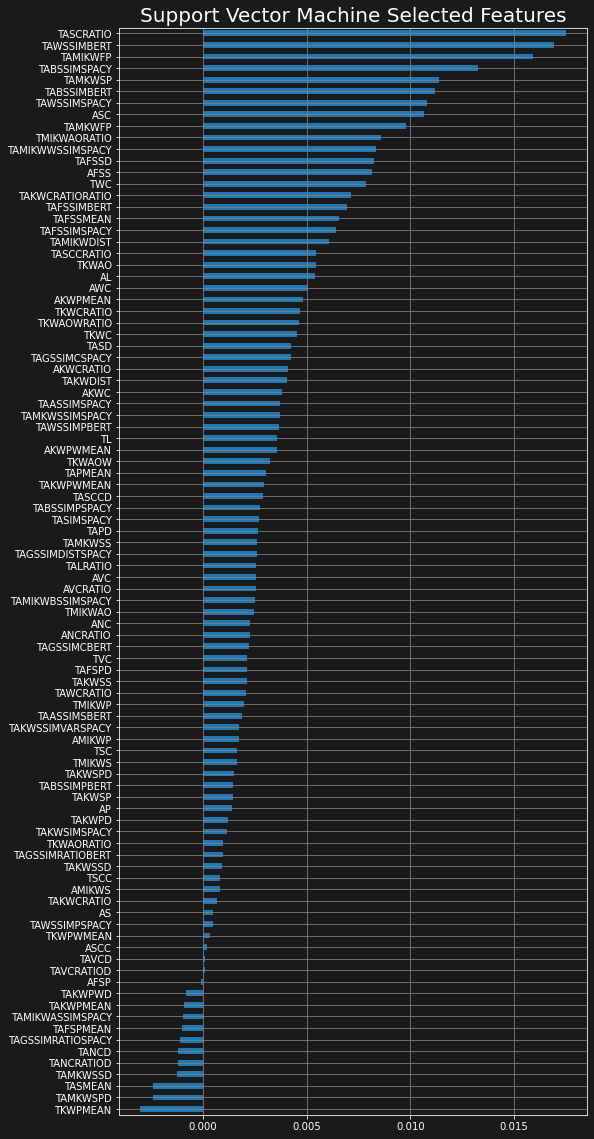

In [52]:
matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)
ax = imp_coef.plot(kind = "barh")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Support Vector Machine Selected Features",
          fontsize=20,
          color="white")
plt.grid(c='gray')
fig.savefig('../../images/svm_features.png', transparent=False)

In [86]:
train_features, test_features, train_labels, test_labels = train_test_split(features_selected, labels, test_size = 0.25, random_state = 42)

In [87]:
svm_final.fit(train_features, train_labels)

SVC(C=100, gamma=0.001, random_state=42)

In [88]:
predictions = svm_final.predict(test_features)

In [89]:
test_labels_real = np.array([(label/2)+1 for label in test_labels])
predictions_real = np.array([(prediction/2)+1 for prediction in predictions])

In [90]:
test_labels

array([3, 5, 5, 6, 3, 5, 6, 5, 3, 5, 5, 5, 5, 6, 2, 7, 6, 7, 4, 4, 6, 5,
       6, 6, 6, 7, 5, 3, 6, 6, 6, 4, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 7, 6, 4, 3, 6, 6, 7, 5, 7, 6, 2, 7, 5, 4, 6, 6, 4, 7, 6, 6,
       8, 1, 7, 5, 7, 5, 3, 2, 7, 5, 6, 7, 4, 7, 7, 6, 4, 2, 5, 6, 6, 5,
       4, 6, 5, 5, 4, 5, 4, 4, 5, 6, 3, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 4,
       6, 6, 6, 5, 5, 5, 1, 7, 4, 4, 3, 6, 7, 4, 5, 6, 4, 7, 6, 5, 6, 6,
       4, 4, 7, 6, 6, 3, 4, 6, 7, 5, 6, 6, 4, 4, 6, 7, 8, 8, 5, 4, 6, 2,
       6, 5, 3, 5, 5, 3, 6, 4, 5, 5, 6, 4, 5, 6, 4, 5, 7, 3, 6, 6, 6, 8,
       6, 4, 5, 6, 6, 7, 4, 5, 5, 5, 7, 8, 8, 5, 8, 5, 4, 4, 5, 5, 5, 5,
       4, 4, 5, 5, 3, 6, 7, 5, 5, 3, 6, 7, 6, 6, 6, 7, 5, 4, 2, 5, 7, 5,
       6, 5, 5, 5, 7, 7, 4, 5, 5, 5, 6, 4, 7, 4, 6, 5, 7, 6, 8, 5, 5, 6],
      dtype=int64)

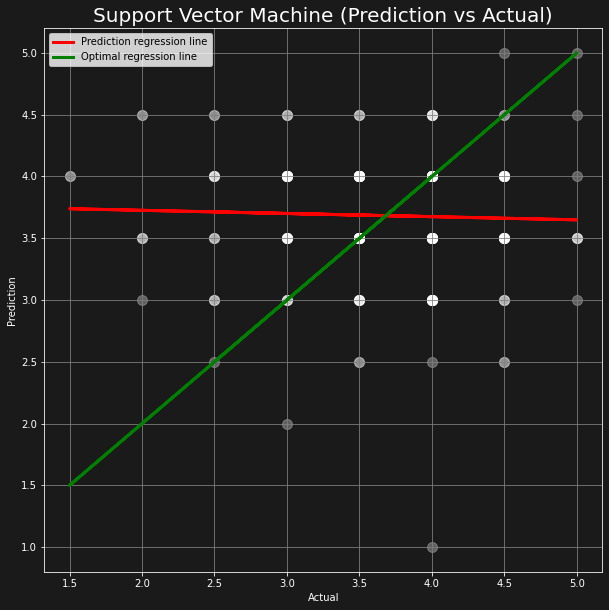

In [91]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(test_labels_real, predictions_real,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(test_labels_real, predictions_real, 1)
ax.plot(test_labels_real, m*test_labels_real+b, color='red', linewidth=3, label="Prediction regression line")
ax.legend()
ax.plot(test_labels_real, test_labels_real, color='green', linewidth=3, label="Optimal regression line")
ax.legend()
plt.xlabel("Actual")
plt.ylabel("Prediction")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Support Vector Machine (Prediction vs Actual)",
          fontsize=20,
          color="white")
plt.grid(c='gray')
plt.savefig('../../images/svm.png', transparent=False)